# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
> Estimates the relationship between one independent variable and one dependent variable using a straight line
- What type of machine learning is linear regression?
> Supervised model
- What is a “line of best fit” using the OLS method?
> A straight line that minimizes the distance between it and some data.
- What is the difference between correlation and regression?
> Correlation shows the linear strength between two variables, and Regression shows the relationship as an equation.
- Describe a scenario when you would use linear regression and why you would use it.
> When lots of data values are at play, or when theres a similar path shown on data models (naive, but still a good starting point).


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
> Data shows a linear relationship between at least two variables
- Normality
> Normal 'Bell Curve' distrubution of data
- Homoscedasticity
> Data must not shoot/spread out on either end of the curve
- No multicollinearity
> No correlation between independent variables
- No endogeneity
> When the predictor variable has no correlation with the error term in a model. Endogeneity loosely refers to outside influences that may have an impact on correlation between two variables, and if it can be seen as a casual effect or not.
- No autocorrelation
> No repeating patterns in the data

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
> Constant C variable, shows the verticle movement
- Coefficient of Independent Variable (B1)
> Slope coefficient, higher valuses indicates independent variable increase, and the mean of the dependent variable tents to increase as well.
- Standard Error
> Average distance that the observed values fall from the regression line
- T-Statistic
> Helps determine the overall linearity of a relatioship between two variables. 
- P-Value of T-Statistic (from the independent variable)
> Result of T-Stat test that reveals the significance of regression.

### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
> Value between 1 and -1, that helps determine variance.
- Adjusted R-squared
> Helps with the 'big-event' variance, and only takes more normalized data occurences.


# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [13]:
# make necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sys
import warnings

from sklearn.linear_model import LinearRegression

In [8]:
# load data
df = pd.read_csv('house_data.csv')

### Step 2: Explore the data 

#### Spend time exploring the data and looking for relationships between variables. 

In [9]:
# explore data below (you will need to make new cells)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,1,3,7.0,1180.0,0,1955.0,98178.0,47.5112,-122.257,1340
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,1,3,7.0,2170.0,400,1951.0,98125.0,47.7210,-122.319,1690
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,1,3,6.0,770.0,0,1933.0,98028.0,47.7379,-122.233,2720
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,1,5,7.0,1050.0,910,1965.0,98136.0,47.5208,-122.393,1360
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,1,3,8.0,1680.0,0,1987.0,98074.0,47.6168,-122.045,1800


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,house_condition,grade,sqft_above,sqft_basement,year_built,zipcode,lat,long,sqft_living_15
count,2.045600e+04,2.045600e+04,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20456.000000,20452.000000,20456.000000,20456.000000,20456.000000
mean,4.634802e+09,4.863355e+05,3.310422,2.032062,1942.120258,10302.509875,1.473455,0.004155,1.179165,3.411322,7.514241,1679.184542,262.887808,1969.985041,95297.064395,47.559194,-122.219543,1902.208594
std,2.877504e+09,2.398423e+05,0.855849,0.689049,724.345438,12700.282036,0.537955,0.064329,0.661116,0.652286,1.026879,683.115368,390.859372,29.355600,15428.241686,0.139330,0.138576,585.143495
min,1.000102e+06,3.209000e+03,1.000000,0.000000,370.000000,520.000000,1.000000,0.000000,1.000000,1.000000,3.000000,300.000000,0.000000,1900.000000,9801.000000,47.155900,-122.512000,399.000000
25%,2.161850e+09,3.120000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1170.000000,0.000000,1950.750000,98032.000000,47.467200,-122.332000,1460.000000
50%,3.992700e+09,4.350000e+05,3.000000,2.000000,1840.000000,7412.000000,1.000000,0.000000,1.000000,3.000000,7.000000,1500.000000,0.000000,1972.000000,98072.000000,47.569650,-122.244500,1790.000000
75%,7.387500e+09,6.020000e+05,4.000000,2.500000,2410.000000,10022.250000,2.000000,0.000000,1.000000,4.000000,8.000000,2080.000000,520.000000,1995.000000,98118.000000,47.679400,-122.134000,2260.000000
max,9.900000e+09,1.640000e+06,6.000000,4.250000,4600.000000,133729.000000,3.500000,1.000000,5.000000,5.000000,12.000000,3960.000000,1540.000000,2050.000000,98199.000000,47.777600,-121.315000,3790.000000


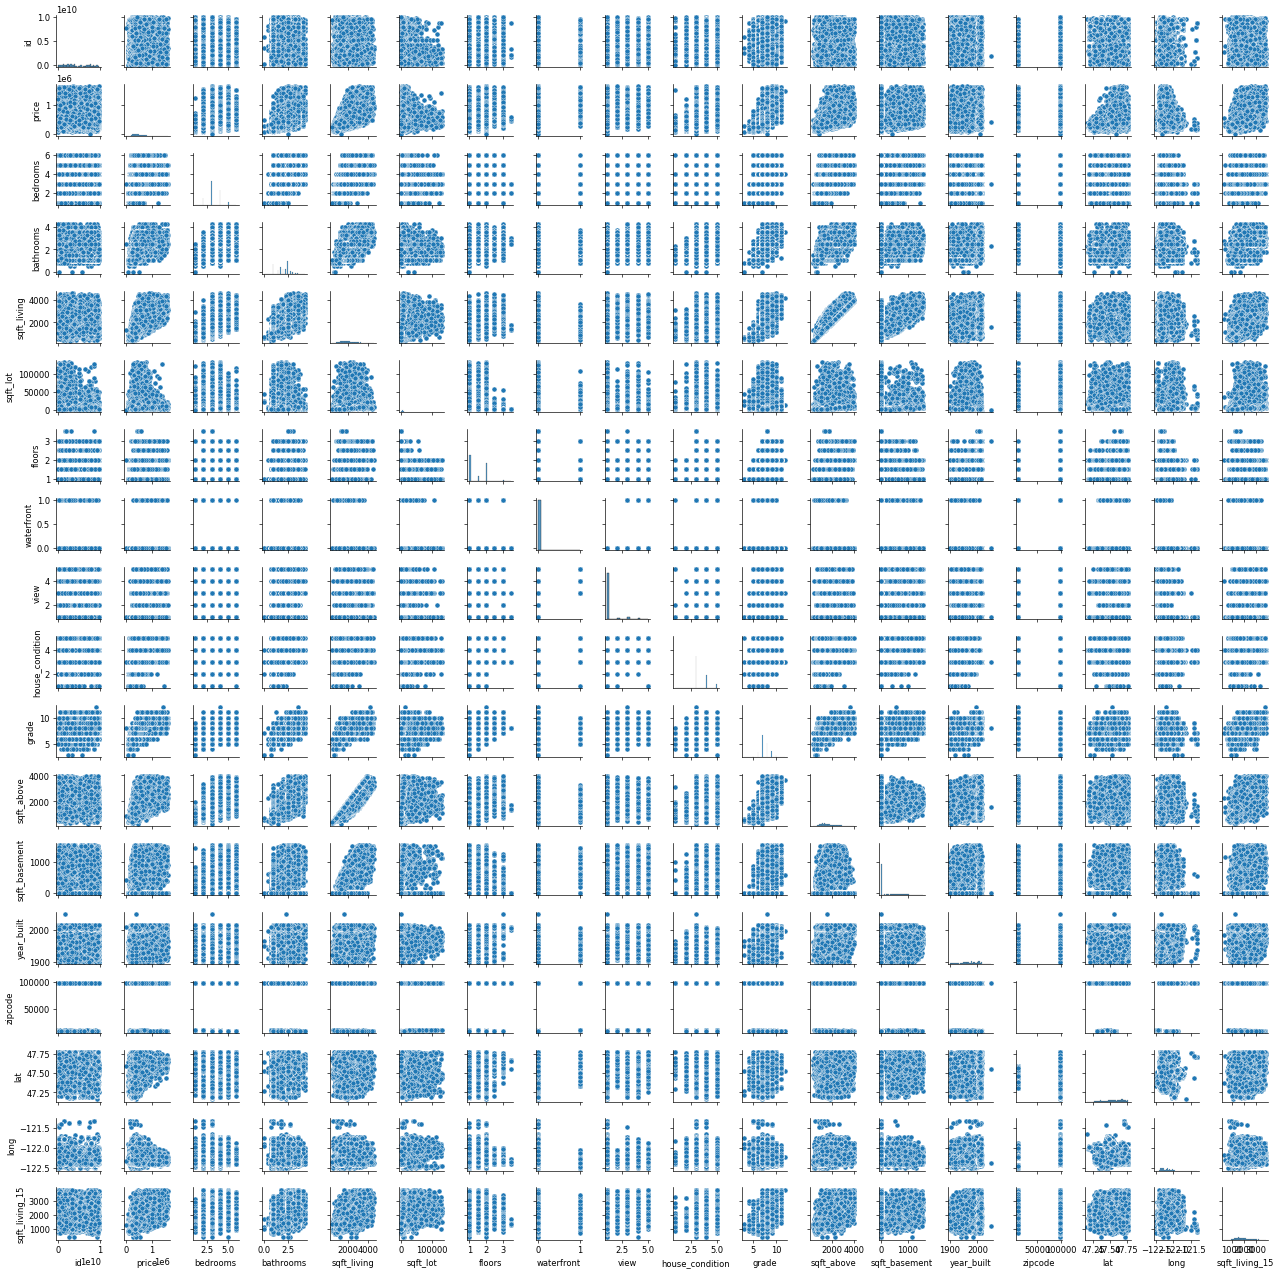

In [22]:
sns.pairplot(df, height = 1.2);

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

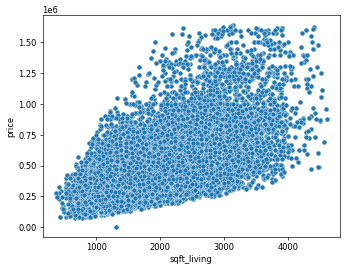

In [24]:
sns.scatterplot(data=df, x=df.sqft_living, y=df.price)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

### Step 3: Determine independent and dependent variable

In [30]:
# set X 
x = train.sqft_living
x = x.to_numpy()
x = x.reshape(-1, 1)

X = test.sqft_living
X = X.to_numpy()
X = X.reshape(-1, 1)

# set Y 

y = train.price
y = y.to_numpy()
y = y.reshape(-1, 1)

Y = train.price
Y = Y.to_numpy()
Y = Y.reshape(-1, 1)

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

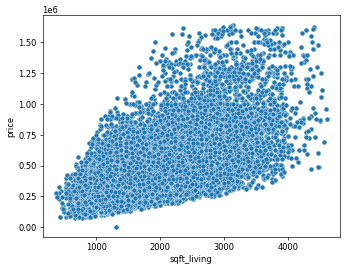

In [32]:
# visualize relationship between X and Y
sns.scatterplot(data=df, x=df.sqft_living, y=df.price)

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [34]:
# fit model to X and Y variables (you will need to make more cells)
import statsmodels.api as sm
from scipy import stats

X_sci = df.sqft_living

y_sci = df.price

X2_sci = sm.add_constant(X_sci)
est = sm.OLS(y_sci, X2_sci)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:38:19   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
reg = LinearRegression()

In [41]:
reg.fit(x, y)
# reg.coef_

LinearRegression()

In [43]:
reg.coef_

array([[204.90178378]])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

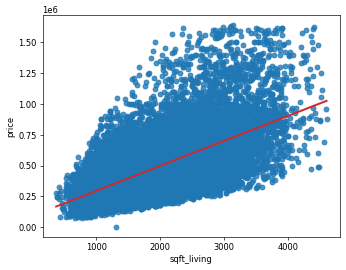

In [48]:
sns.regplot(data=reg, x=df.sqft_living, y=df.price, line_kws={'color': 'C3'})

### Step 5: Interpret Model Summary 

In [51]:
# print out and interpret model summary // terms identified below
reg.score(x,y)

0.3776054632825142

In [53]:
r2 = reg.score(x,y)

n = x.shape[0]
p = x.shape[1]
adjusted_r2 = 1-(1-r2)*((n-1)/(n-p-1))
adjusted_r2

0.37756742425692347

In [55]:
from sklearn.feature_selection import f_regression

In [56]:
f_regression(x,y)

(array([9926.79116821]), array([0.]))

In [58]:
p_value = f_regression(x,y)[1]
p_value

array([0.])

In [60]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [61]:
X_sci = df.sqft_living

y_sci = df.price

X2_sci = sm.add_constant(X_sci)
est = sm.OLS(y_sci, X2_sci)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:47:30   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpret the following from your model:

- R-squared
> r2 = 0.377
- Coefficient of independent variable
> 0
- P-value of T-statistic
> 110.966
- P-value of F-statistic
> 0

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [63]:
# predict new y values (dependent variables) by feeding model new independent variable values
predict_values = np.array([900, 9000, 8907908])
predict_values = predict_this.reshape(-1, 1)


reg.predict(predict_values)

array([[2.73221821e+05],
       [1.93292627e+06],
       [1.82533505e+09]])

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

In [65]:
# Pick another independent variable. Be sure to avoid multicollinearity. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [67]:
xm = train[["sqft_living", "sqft_living_15"]]
xm = xm.to_numpy()
# xm = xm.reshape(-1, 1)

XM = test[["sqft_living", "sqft_living_15"]]
XM = XM.to_numpy()
XM = XM.reshape(-1, 1)

# set Y 

y = train['price']
y = y.to_numpy()
y = y.reshape(-1, 1)

Y = train['price']
Y = Y.to_numpy()
Y = Y.reshape(-1, 1)

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [69]:
# fit new regression model (you will need to make more cells)
reg.fit(xm, y)

LinearRegression()

<AxesSubplot:xlabel='sqft_living_15', ylabel='price'>

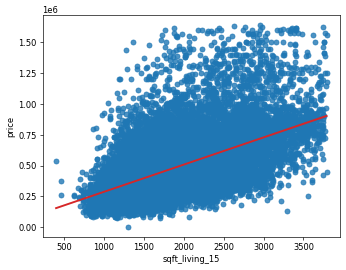

In [72]:
sns.regplot(data=reg, x=df.sqft_living_15, y=df.price, line_kws={'color': 'C3'})

In [73]:
X_sci = df[["sqft_living_15", "sqft_living"]]

y_sci = df.price

X2_sci = sm.add_constant(X_sci)
est = sm.OLS(y_sci, X2_sci)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     6645.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:56:39   Log-Likelihood:            -2.7731e+05
No. Observations:               20456   AIC:                         5.546e+05
Df Residuals:                   20453   BIC:                         5.546e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.101e+04   4480.828      6.921      0.000    2.22e+04    3.98e+04
sqft_living_15    80.4457      3.256     24.708      0.000      74.064      86.827
sqft_living      155.6531      2.630     59.181      0.000     150.498     160.808
==============================================================================
Omnibus:                     3833.210   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8676.364
Skew:                           1.076   Prob(JB):                         0.00
Kurtosis:                       5.355   Cond. No.                     9.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 
> .394
- Adjusted R-squared
> .394
- Coefficient of independent variables
> sqft_living_15 = 80.445 |||
> sqft_living = 155.653
- P-value of T-statistic
> 	0 for both
- P-value of F-statistic
> 0

If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Step 4: Predict Values

In [74]:
# predict new y values (dependent variables) by feeding model new independent variable values
reg.predict(test[["sqft_living", "sqft_living_15"]])

array([[562356.23838802],
       [545828.86726034],
       [430110.46321249],
       ...,
       [723109.77067847],
       [619333.59397902],
       [506894.54451049]])

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In [ ]:
# create new markdown cell and write down your observations

# Part 4 - Multivariate Time Series Analysis

In [ ]:
# complete the time series analysis exercise separately from data-time-series folder

# Part 5 - Submit Project 